# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Immanuel Mayerd
- Email: mayerdsiahaan@gmail.com
- Id Dicoding: maayerdd

## Menentukan Pertanyaan Bisnis

- Apakah ada pengaruh musim dengan banyaknya penyewa sepeda kasual maupun teregistrasi?
- Apakah ada pengaruh jam-jam tertentu dengan banyaknya penyewa sepeda kasual maupun teregistrasi?
- Bagaimana trend penyewaan sepeda untuk penyewa kasual dan penyewa yang teregistrasi tiap bulannya?
- Bagaimana pertumbuhan trend penyewaan sepeda dari 2011 - 2012?
- Bagaimana hubungan antara suhu, kelembapan dan kecepatan angin dengan banyaknya penyewa?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Pada tahap ini saya menggunakan Bike Sharing Dataset. File-file yang akan saya gunakan adalah days.csv dan hr.csv

In [2]:
#Data harian
daily_df = pd.read_csv("data\day.csv")
daily_df.head()                       

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Data tiap jam
hourly_df = pd.read_csv("data/hour.csv")
hourly_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Assessing Data

### Menilai data harian

In [4]:
#Memeriksa tipe data tiap kolom
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada tahap ini terlihat bahwa dteday akan lebih baik jika tipe datanya diubah menjadi datetime untuk memudahkan perhitungan yang berhubungan dengan waktu. Selain itu untuk data berulang seperti season, ye, mnth dll perlu diubah juga tipe datanya sebagai tipe data category untuk menghemat penggunaan memori.

In [5]:
#memeriksa missing value
daily_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataset daily_df tidak memiliki nilai null

In [6]:
#Memeriksa Data duplikat
daily_df.duplicated().sum()

0

dataset daily_df tidak memiliki kolom duplikat

In [7]:
#Memeriksa nilai-nilai statistik
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Secara statistik tidak terlihat data yang terlihat aneh

### Menilai Data tiap jam

In [8]:
#Memeriksa tipe data tiap kolom
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada tahap ini terlihat bahwa dteday akan lebih baik jika tipe datanya diubah menjadi datetime untuk memudahkan perhitungan yang berhubungan dengan waktu. Selain itu untuk data berulang seperti season, ye, mnth dll perlu diubah juga tipe datanya sebagai tipe data category untuk menghemat penggunaan memori.

In [9]:
#memeriksa missing value
hourly_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataset hourly_df tidak terdapat nilai null

In [10]:
#Memeriksa Data duplikat
hourly_df.duplicated().sum()

0

Dataset hourly_df tidak memiliki kolom duplikat

In [11]:
#Memeriksa nilai-nilai statistik
hourly_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Secara statistik tidak terlihat data yang aneh

### Cleaning Data

1. Mengubah nama kolom
Untuk mempermudah analisis data ke depannya, maka nama-nama kolom perlu diubah dengan kata-kata yang lebih jelas

In [12]:
#Mengubah nama kolom dataframe
daily_df.rename(columns={'instant':'record','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)
hourly_df.rename(columns = {'instant':'record','dteday':'datetime','yr':'year','mnth':'month', 'hr': 'hour','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

2. Mengubah tipe data kolom datetime 

In [13]:
#Mengubah tipe data kolom 'datetime' menjadi datetime
daily_df['datetime'] = pd.to_datetime(daily_df['datetime'])  
hourly_df['datetime'] = pd.to_datetime(hourly_df['datetime'])  

3. Mengubah nama unit tiap kolom

In [14]:
#Mengubah nama unit
month_map = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 
             5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 
             9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}

season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

day_map = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

weather_map = {1:'clear', 2:'cloudy', 3: 'light snow', 4: 'heavy rain'}


daily_df['month'] = daily_df['month'].map(month_map)
hourly_df['month'] = hourly_df['month'].map(month_map)

daily_df['season'] = daily_df['season'].map(season_map)
hourly_df['season'] = hourly_df['season'].map(season_map)

daily_df['weekday'] = daily_df['weekday'].map(day_map)
hourly_df['weekday'] = hourly_df['weekday'].map(day_map)

daily_df['weather_condition'] = daily_df['weather_condition'].map(weather_map)
hourly_df['weather_condition'] = hourly_df['weather_condition'].map(weather_map)
    

4. Menugubah tipe data objek menjadi kategori

In [15]:
for col in ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']:
    daily_df[col] = daily_df[col].astype('category')
    hourly_df[col] = hourly_df[col].astype('category')

In [16]:
daily_df.info()
print("")
hourly_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   record             731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

Terlihat tipe data pada dataset daily_df dan hourly_df sudah sesuai dengan keinginan

## Exploratory Data Analysis (EDA)

### RFM Analysis

In [17]:
RFM_df = daily_df
recency_overall = (pd.to_datetime('today') - RFM_df['datetime'].max()).days

RFM_df['Frequency'] = daily_df['total_count']
frequency = RFM_df['Frequency'].sum()

RFM_df['Monetary'] = daily_df['total_count'] 
monetary = RFM_df['Monetary'].sum()

print(recency_overall)
print(frequency)
print(monetary)

3946
3292679
3292679


Terlihat bahwa pembelian terakhir terjadi pada 3946 hari yang lalu, dengan frequency sebanyak 3292679 dan monetary sebanyak 3292679 dikali dengan harga sewa (yang tidak ada pada dataset)

### Explore untuk menjawab pertanyaan

In [18]:
#eksplorasi berdasarkan season
daily_df.groupby(by='season').agg({
    'casual' : ['mean','max','min'],
    'registered':['mean','max','min'],
    'total_count':['mean','max','min']
}).round(2).sort_values(by=('total_count','mean'),ascending=False)

casual            registered            total_count            
           mean   max  min       mean   max  min        mean   max   min
season                                                                  
fall    1202.61  3160  118    4441.69  6917  889     5644.30  8714  1115
summer  1106.10  3410  120    3886.23  6456  674     4992.33  8362   795
winter   729.11  3031    2    3999.05  6946   20     4728.16  8555    22
spring   334.93  3155    9    2269.20  5315  416     2604.13  7836   431

In [19]:
#eksplorasi berdasarkan jam
hourly_df.groupby(by='hour')['total_count'].mean().round(2)

hour
0      53.90
1      33.38
2      22.87
3      11.73
4       6.35
5      19.89
6      76.04
7     212.06
8     359.01
9     219.31
10    173.67
11    208.14
12    253.32
13    253.66
14    240.95
15    251.23
16    311.98
17    461.45
18    425.51
19    311.52
20    226.03
21    172.31
22    131.34
23     87.83
Name: total_count, dtype: float64

In [20]:
#Explorasi berdasarkan bulan
ordered_month = ['Januari', 'Februari', 'Maret', 'April', 
                 'Mei', 'Juni', 'Juli', 'Agustus', 
                 'September', 'Oktober', 'November','Desember']
daily_df.groupby(by='month')['total_count'].mean().round(2).reindex(ordered_month)

month
Januari      2176.34
Februari     2655.30
Maret        3692.26
April        4484.90
Mei          5349.77
Juni         5772.37
Juli         5563.68
Agustus      5664.42
September    5766.52
Oktober      5199.23
November     4247.18
Desember     3403.81
Name: total_count, dtype: float64

In [21]:
#Eksplorasi berdasarkan tahun
daily_df.groupby(by='year')['total_count'].mean().round(2)

year
0    3405.76
1    5599.93
Name: total_count, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1:Apakah ada pengaruh musim dengan banyaknya penyewa sepeda kasual maupun teregistrasi?

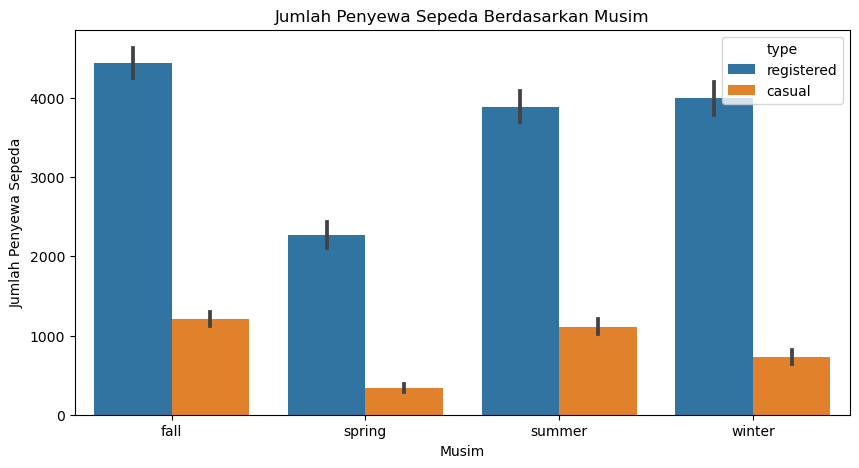

In [22]:
melted_df = daily_df.melt(id_vars=['season'], value_vars=['registered', 'casual'], 
                          var_name='type', value_name='count')

plt.figure(figsize=(10,5))
sns.barplot(
    x='season',
    y='count',
    hue='type',
    data=melted_df
    )
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()


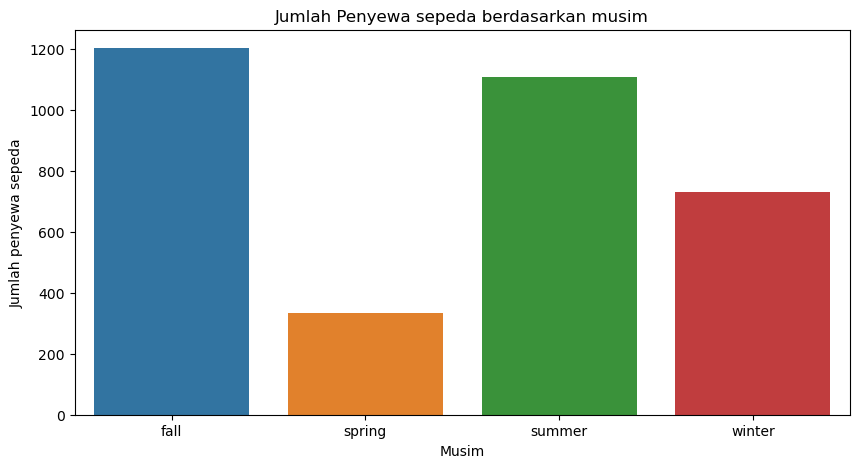

In [23]:
casual_df = daily_df.groupby(by='season')['casual'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    x= 'season',
    y='casual',
    data = casual_df
    )
plt.title('Jumlah Penyewa sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah penyewa sepeda')
plt.show()


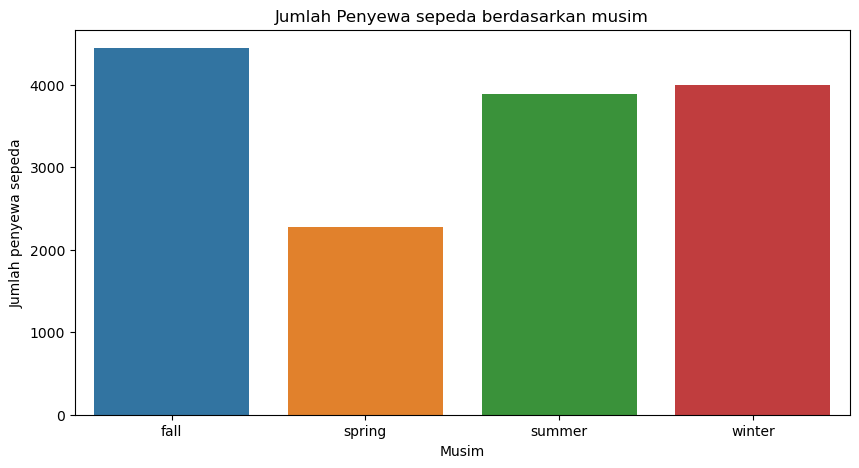

In [24]:
registered_df = daily_df.groupby(by='season')['registered'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    x= 'season',
    y='registered',
    data = registered_df
    )
plt.title('Jumlah Penyewa sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah penyewa sepeda')
plt.show()


Dari visualisasi-visualisasi di atas terlihat bahwa pada saat spring, tingkat penyewaan sepeda cenderung rendah dibandingkan dengan musim-musim lainnya. Saat fall, penyewaan sepeda lebih diminati diikuti dengan summer dan winter baik untuk penyewa casual maupun penyewa registered.

### Pertanyaan 2: Apakah ada pengaruh jam-jam tertentu dengan banyaknya penyewa sepeda kasual maupun teregistrasi?

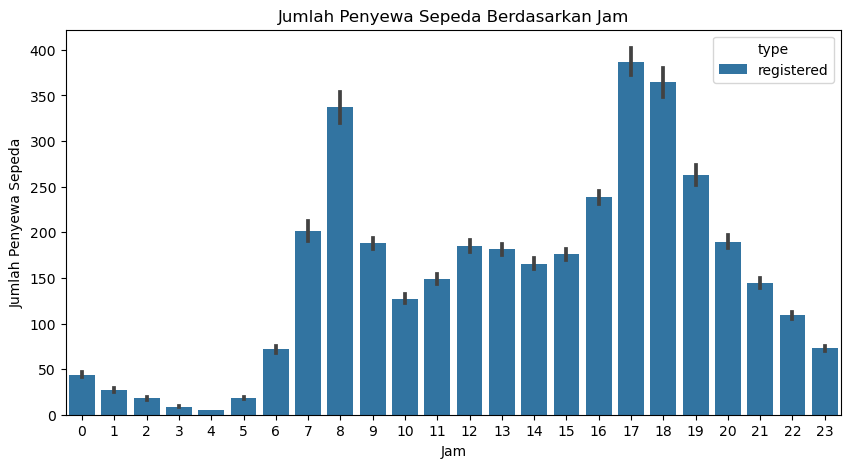

In [25]:
melted_df = hourly_df.melt(id_vars=['hour'], value_vars=['registered'], 
                          var_name='type', value_name='count')

plt.figure(figsize=(10,5))
sns.barplot(
    x='hour',
    y='count',
    hue='type',
    data=melted_df
    )
plt.title('Jumlah Penyewa Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()


Terlihat bahwa penyewa registered cenderung lebih aktif pada waktu-waktu tertentu. Beberapa di antaranya adalah jam 8 pagi dan jam 5-6 sore.

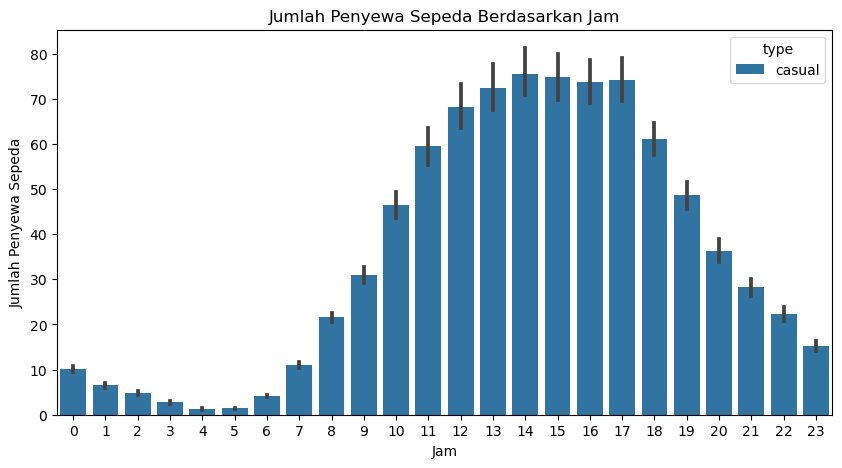

In [26]:
melted_df = hourly_df.melt(id_vars=['hour'], value_vars=['casual'], 
                          var_name='type', value_name='count')

plt.figure(figsize=(10,5))
sns.barplot(
    x='hour',
    y='count',
    hue='type',
    data=melted_df
    )
plt.title('Jumlah Penyewa Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()


Sedangkan untuk penyewa kasual penyewa mulai ramai dari jam 10 pagi hingga jam 7 malam.

### Pertanyaan 3: Bagaimana trend penyewaan sepeda untuk penyewa kasual dan penyewa yang teregistrasi tiap bulannya?

### Pertanyaan 4: Bagaimana pertumbuhan trend penyewaan sepeda dari 2011 - 2012?

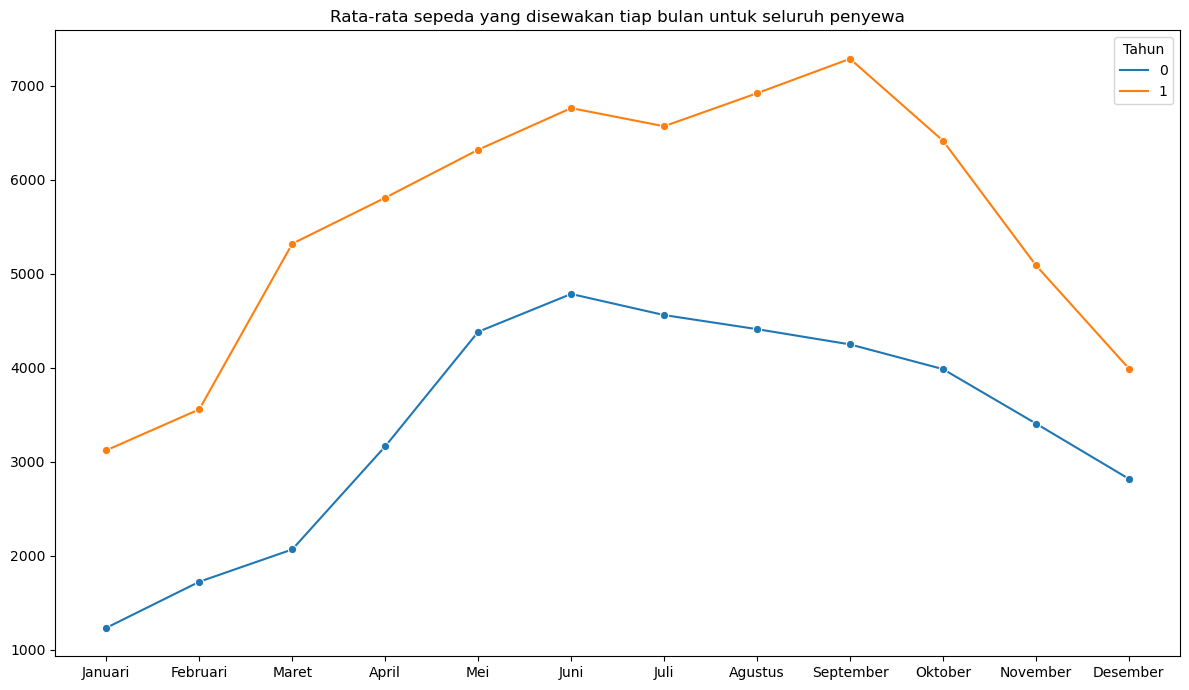

In [27]:
month_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
daily_df['month'] = pd.Categorical(daily_df['month'], categories=month_order, ordered=True)


monthly_counts = daily_df.groupby(by=["month","year"]).agg({
    "total_count": "mean"
}).reset_index()


plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="total_count",
    hue="year",
    marker="o")

plt.title("Rata-rata sepeda yang disewakan tiap bulan untuk seluruh penyewa")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

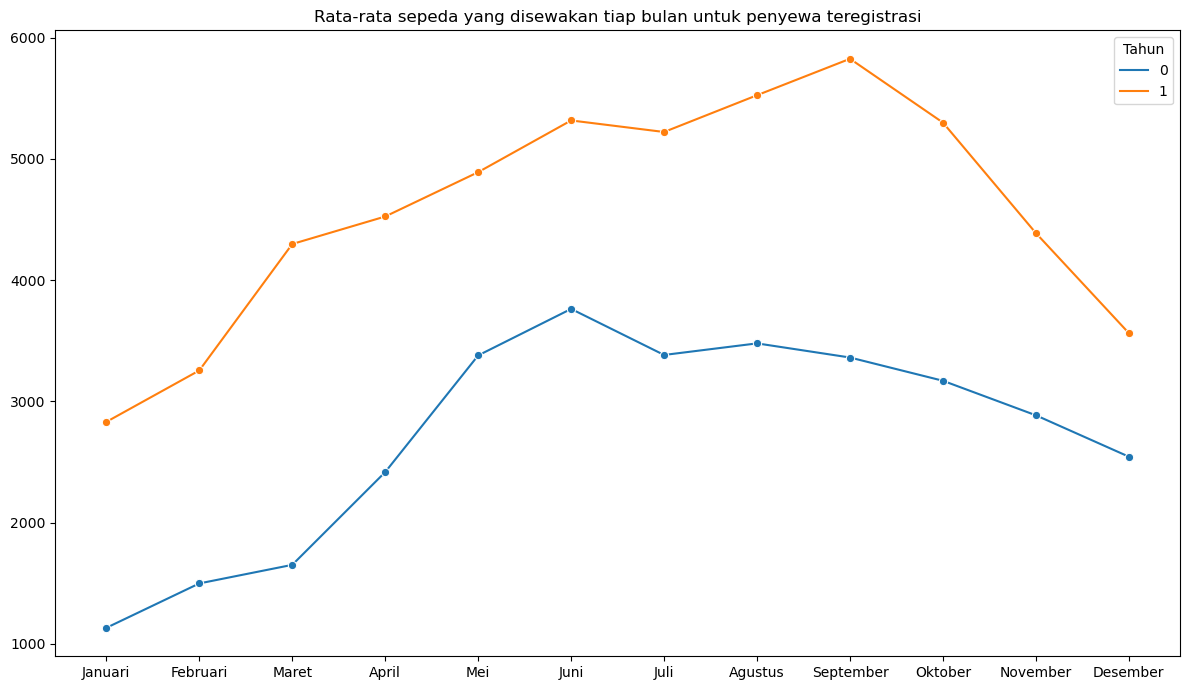

In [28]:
month_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
daily_df['month'] = pd.Categorical(daily_df['month'], categories=month_order, ordered=True)


monthly_counts = daily_df.groupby(by=["month","year"]).agg({
    "registered": "mean"
}).reset_index()


plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="registered",
    hue="year",
    marker="o")

plt.title("Rata-rata sepeda yang disewakan tiap bulan untuk penyewa teregistrasi")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

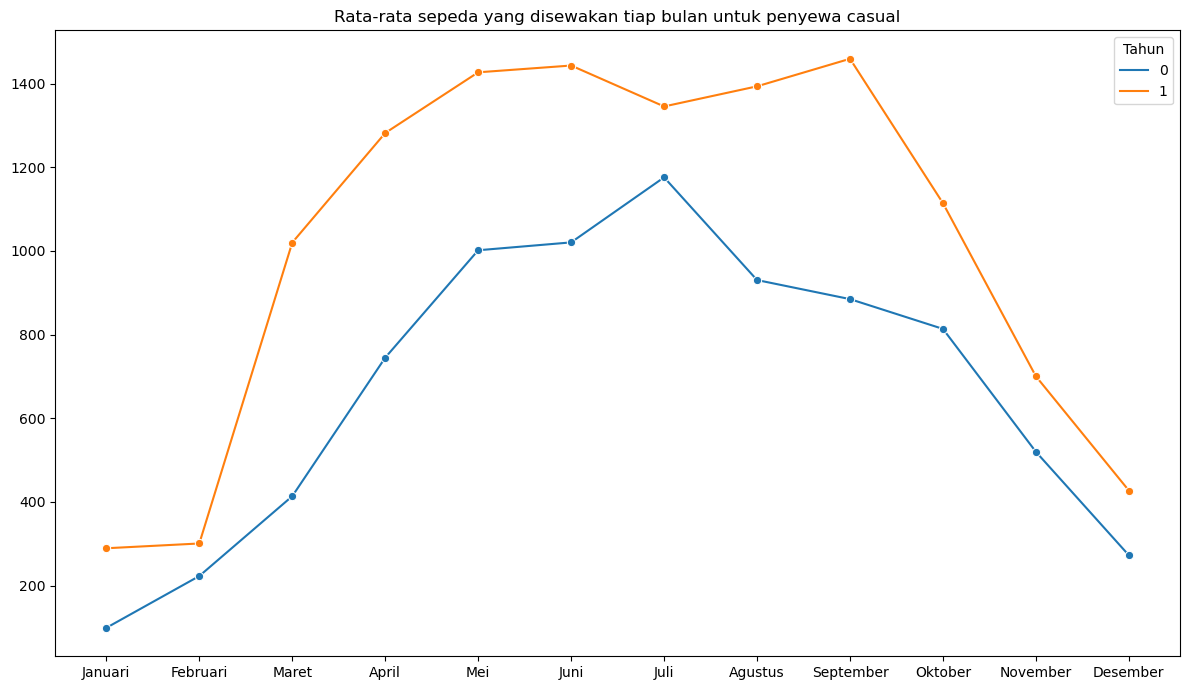

In [29]:
month_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
daily_df['month'] = pd.Categorical(daily_df['month'], categories=month_order, ordered=True)


monthly_counts = daily_df.groupby(by=["month","year"]).agg({
    "casual": "mean"
}).reset_index()


plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="casual",
    hue="year",
    marker="o")

plt.title("Rata-rata sepeda yang disewakan tiap bulan untuk penyewa casual")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Dari gambar di atas, terlihat dari tahun ke tahun terjadi kenaikan penyewa sepeda untuk penyewa teregistrasi maupun penyewa casual. Sedangkan untuk setiap bulannya, memiliki trend masing-masing. Untuk penyewa teregistrasi paling banyak menyewa pada bulan juni di tahun 0 dan bulan september di tahun 1. Sedangkan untuk penyewa casual paling banyak menyewa di bulan juli pada tahun 0 dan september pada tahun 1.

### Pertanyaan 5: Bagaimana hubungan antara suhu, kelembapan dan kecepatan angin dengan banyaknya penyewa?

C:\Users\Immanuel\AppData\Local\Temp\ipykernel_13180\2616655271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = daily_df.corr()


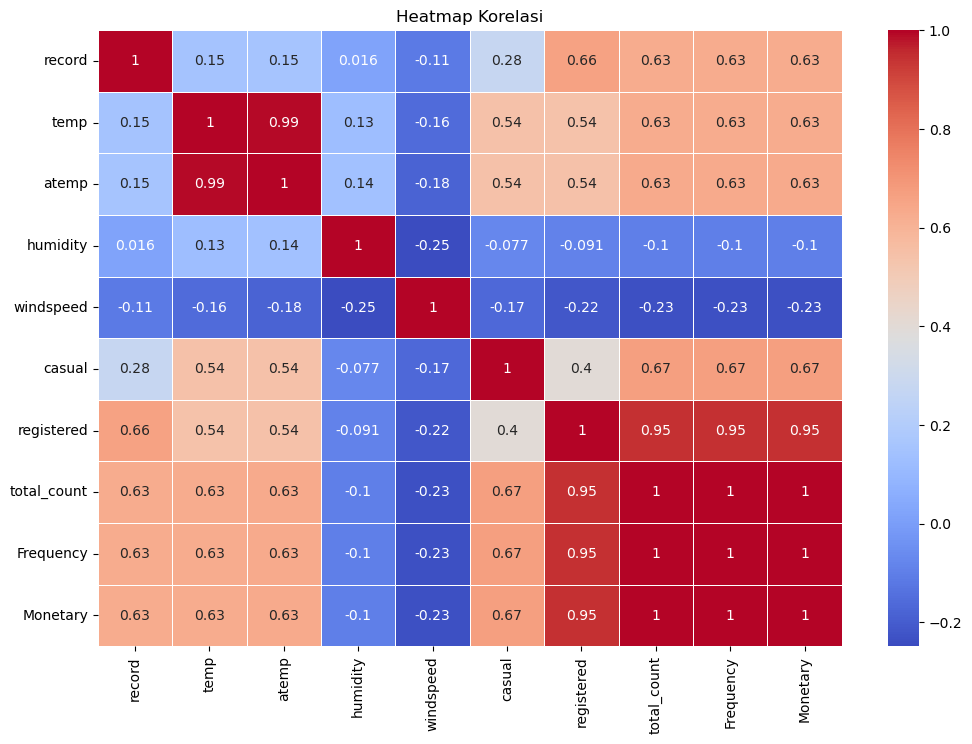

In [30]:
corr_matrix = daily_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()


## Conclusion

- Conclution pertanyaan 1

Dapat disimpulkan bahwa penyewa casual maupun teregistrasi lebih suka menyewa sepeda pada musim fall dan paling tidak suka saat musim spring. 

- conclution pertanyaan 2

Dapat disimpulkan penyewa registered cenderung lebih aktif di jam 8 pagi dan jam 5-6 sore. Sedangkan untuk penyewa kasual penyewa mulai ramai dari jam 10 pagi hingga jam 7 malam. Dari jam aktif ini perusahaan dapat meningkatkan promosi untuk pengguna kasual di saat jam-jam sepi penyewa dari pengguna registered.

- conclution pertanyaan 3

Untuk penyewa Casual : pada bulan januari dan februari cenderung sepi lalu mengalami kenaikan hingga pertengahan tahun kemudian mengalami penurunan sampai akhir tahun pada tahun 0 dan tahun 1. Perusahaan dapat menerapkan strategi-strategi marketing tertentu pada awal dan akhir tahun untuk penyewa casual.
Untuk penyewa registered: Mirip dengan pengguna kasual, pada awal tahun cenderung lebih sepi dan mengalami kenaikan hingga pertengahan tahun lalu mengalami penurunan hingga akhir tahun. Kecuali pada tahun 1 di bulan september, penyewa sepeda mencapai frekuensi tertinggi penyewa di tahun tersebut.

- conclution pertanyaan 4

Penyewa sepeda cenderung mengalami kenaikan dari tahun ke tahun pada tahun 2011 - 2012. Momentum tersebut harus dimanfaatkan untuk kemajuan bisnis.

- conclution pertanyaan 5

Tidak terdapat korelasi yang kuat antara frekuensi penyewa sepeda dengan kecepatan angin, suhu dan kelembapan.